# Electric Fields - All About

## NOTE: This is a copy (with replacement) of AllAbout_MagneticFields !!
Where the replacements have been made: magnetic->electric and bfield->efield.  They are essentially identical, other than of course their effect on particle beams.

This is all about the types of electric fields that are available in OSCARS.  This includes:

* Uniform fields
* Gaussian fields
* Undulator Fields
* Importing field data from files
* Python function for electric field
* Combining different fields

You can also rotate and translate any field easily as is shown in several of the examples.

There are several ways to import field data.  For 2D and 3D grids the grid must be regular.  For 1D spatial data you may import non-equidistant points.

In [1]:
# matplotlib plots inline
%matplotlib inline

# Import the OSCARS and helper modules
import OSCARS
from OSCARSPlotsMPL import *

OSCARS v1.31.03 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create a new OSCARS object
osc = OSCARS.OSCARS()

## Uniform Field

A uniform field can be specified for all space or in a given *width*.  The *width* input list is like a vector representing the length and direction of the field.  It will be centered at [0, 0, 0] unless translated

add_efield_uniform can be thought of as a box where *width* are the dimensions.  If any dimension is 0 it is infinite in that dimension.

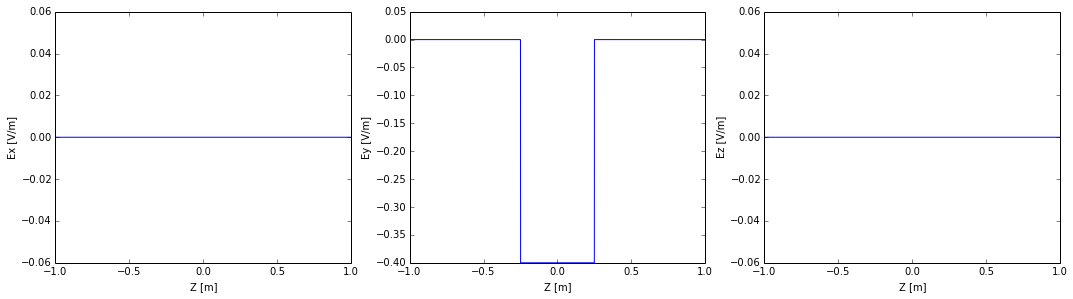

In [3]:
# Clear any previous fields and add a constant electric field of 0.4 [T]
# in the negative Y-direction with a length of 1m in the Z-direction
osc.clear_efields()
osc.add_efield_uniform(efield=[0, -0.4, 0], width=[0, 0, 0.5])

# Plot the field if you like
plot_efield(osc)

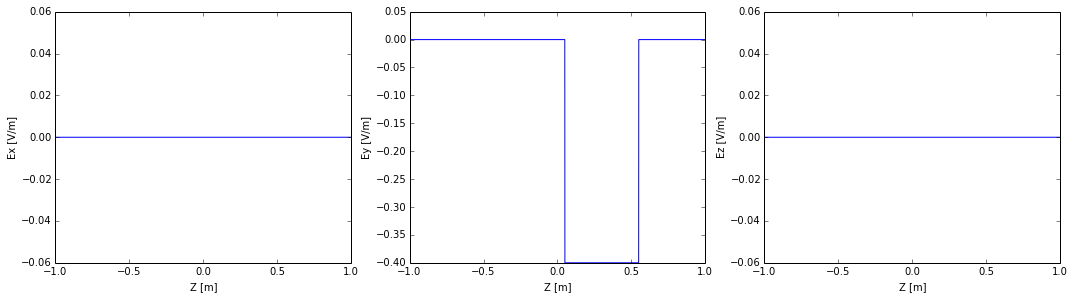

In [4]:
# The same field as above, but translated in space
osc.clear_efields()
osc.add_efield_uniform(efield=[0, -0.4, 0], width=[0, 0, 0.5], translation=[0, 0, 0.3])

# Plot the field if you like
plot_efield(osc)

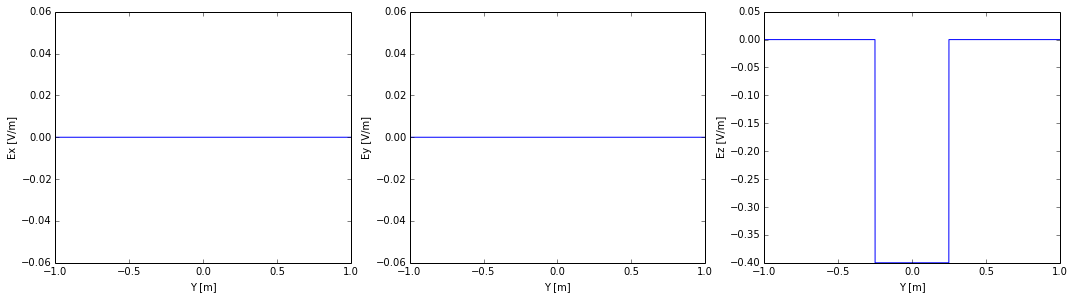

In [5]:
# The same field as above, but on a different axis
osc.clear_efields()
osc.add_efield_uniform(efield=[0, 0, -0.4], width=[0, 0.5, 0])

# Plot the field if you like
plot_efield(osc, axis='Y')

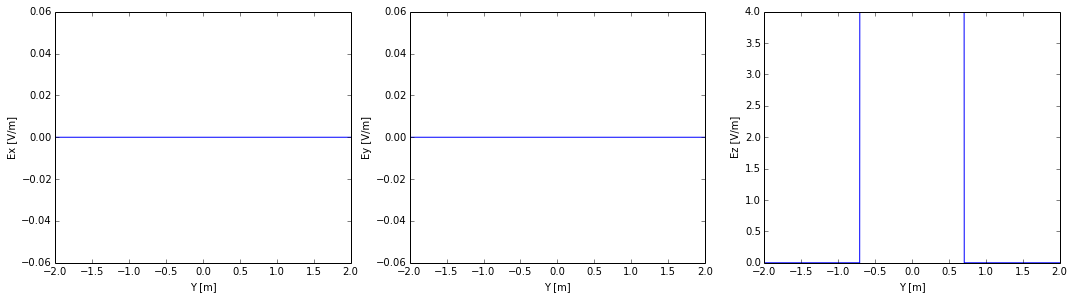

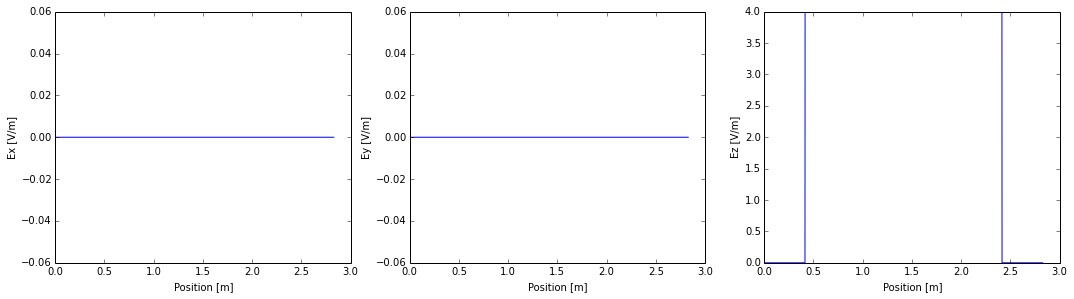

In [6]:
# You can also rotate the field and plot it as a function of a line through any two points
osc.clear_efields()
osc.add_efield_uniform(efield=[0, 0, 4], width=[1, 2, 1], rotations=[0, 0, osc.pi()/4])

# Plot the field if you like
plot_efield(osc, -2, 2, axis='Y')
plot_efield(osc, between_two_points=[[-1, -1, 0], [1, 1, 0]])

## Gaussian Field

This is a gaussian field in 3D.  One can specify the 'sigma' in 1 2, or 3 dimensions

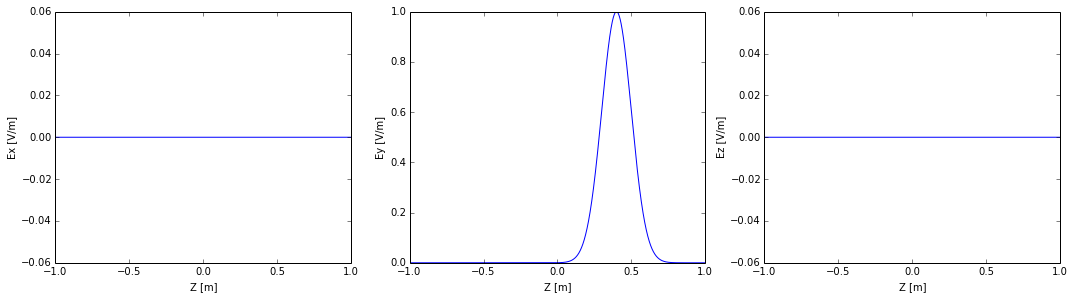

In [7]:
# This is a gaussian with one dimension specified.
osc.clear_efields()
osc.add_efield_gaussian(efield=[0, 1, 0], sigma=[0, 0, 0.1], translation=[0, 0, 0.2])

# Plot the field if you like
plot_efield(osc)

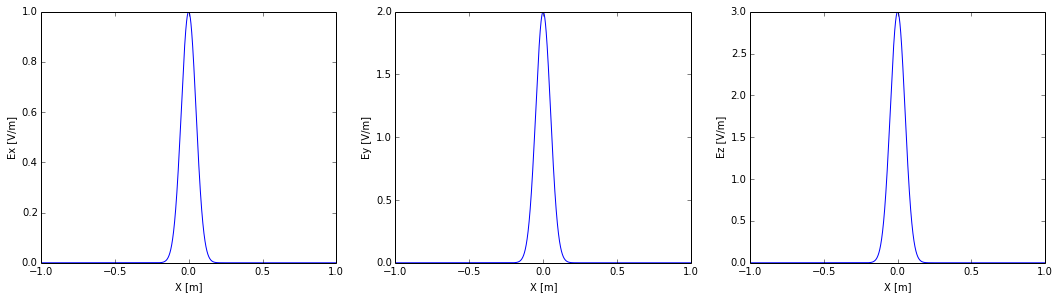

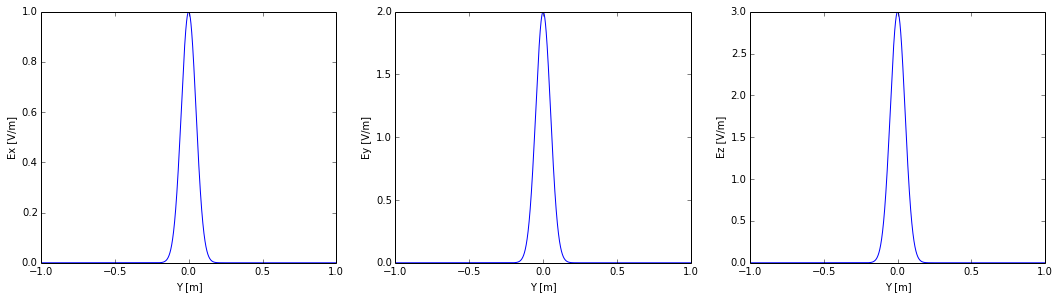

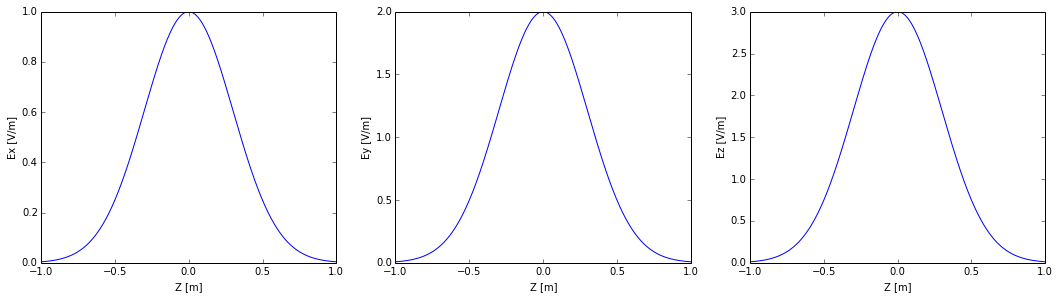

In [8]:
# This is a gaussian with 3 dimensions specified
osc.clear_efields()
osc.add_efield_gaussian(efield=[1, 2, 3], sigma=[0.05, 0.05, 0.3])

# Plot the field if you like
plot_efield(osc, axis='X')
plot_efield(osc, axis='Y')
plot_efield(osc, axis='Z')

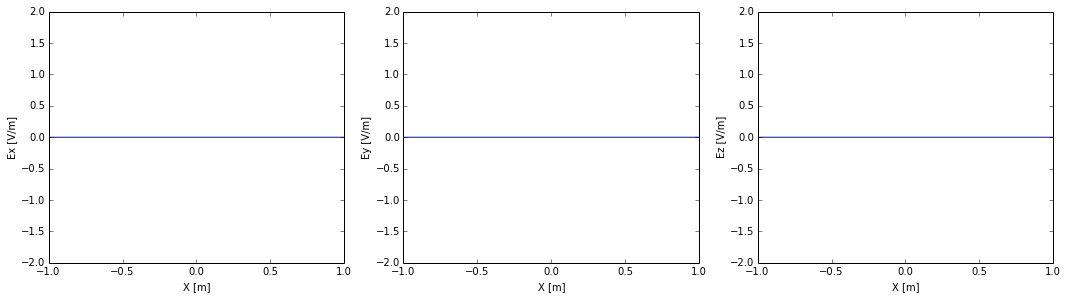

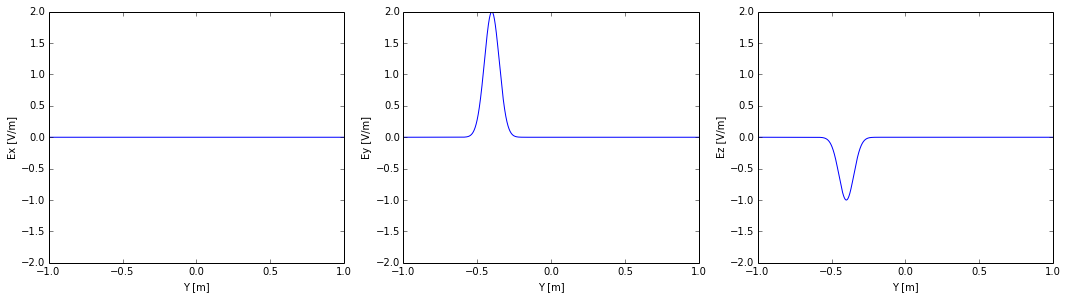

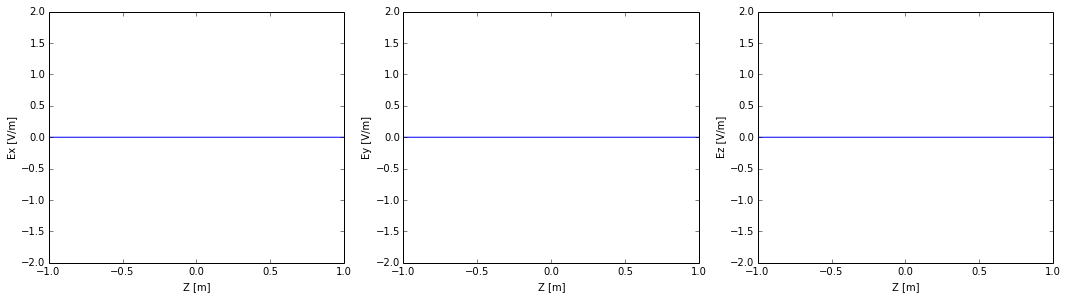

In [9]:
# One can also rotate and translate the gaussian object
osc.clear_efields()
osc.add_efield_gaussian(efield=[1, 2, 0], sigma=[0.05, 0.05, 0.3], rotations=[0, osc.pi()/2, 0], translation=[0, -0.2, 0])

# Plot the field if you like
plot_efield(osc, axis='X', ylim=[-2, 2])
plot_efield(osc, axis='Y', ylim=[-2, 2])
plot_efield(osc, axis='Z', ylim=[-2, 2])

## Undulator Field

It is simple to create a basic undulator field with termination using 'add_undulator'.  You must specify the period (given as a vector), the number of periods, and the peak efield

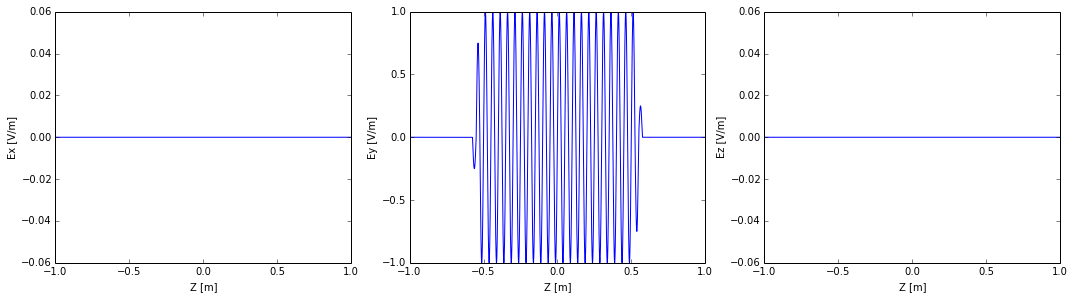

In [10]:
# This is the basic planer undulator field
osc.clear_efields()
osc.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.050], nperiods=21)

# Plot the field if you like
plot_efield(osc, -1, 1, axis='Z')

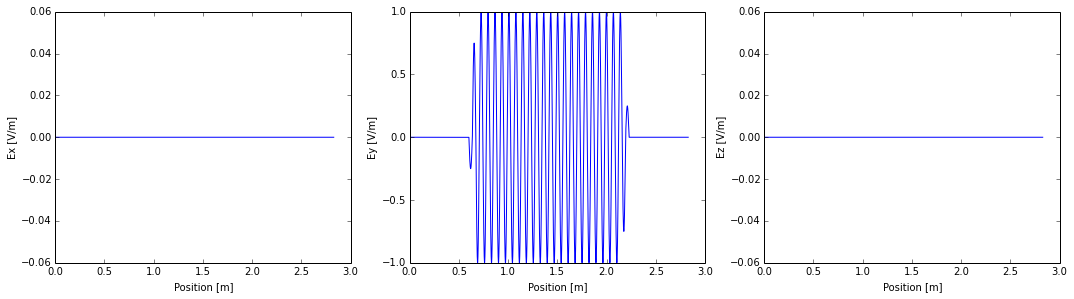

In [11]:
# This is the basic planer undulator field where the axis is in an arbitrary direction
osc.clear_efields()
osc.add_efield_undulator(efield=[0, 1, 0], period=[0.050, 0, 0.050], nperiods=21)

# Plot the field if you like
plot_efield(osc, between_two_points=[[-1, 0, -1], [1, 0, 1]])

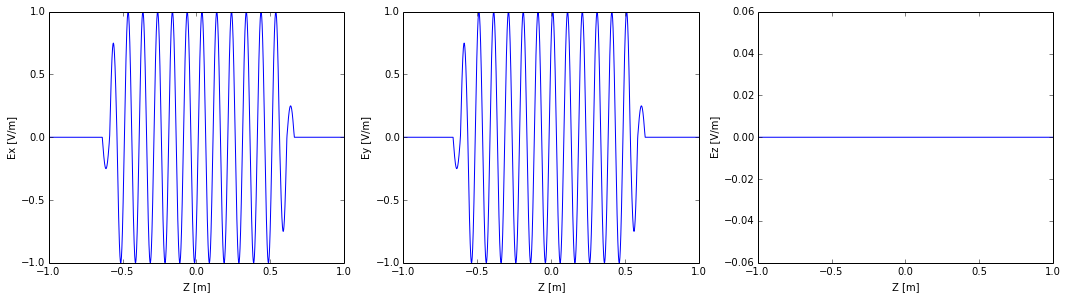

In [12]:
# This is the field of an EPU.  Simply add two undulator fields offset in phase
osc.clear_efields()
osc.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.100], nperiods=11, phase=-osc.pi()/4)
osc.add_efield_undulator(efield=[1, 0, 0], period=[0, 0, 0.100], nperiods=11, phase=+osc.pi()/4)

# Plot the field if you like
plot_efield(osc)

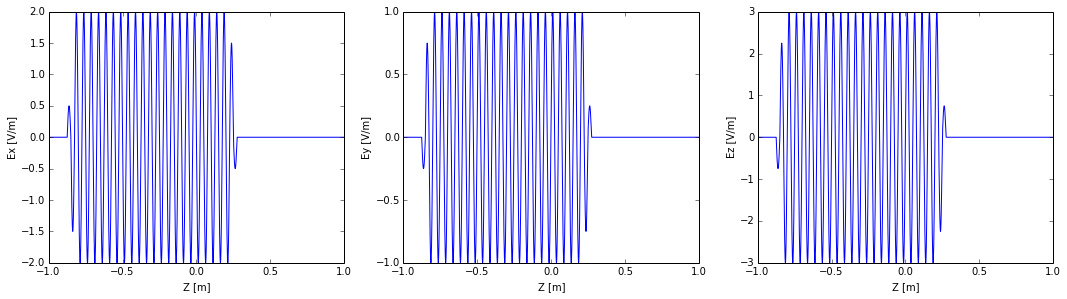

In [13]:
# One can also rotat and translate an undulator field
osc.clear_efields()
osc.add_efield_undulator(efield=[1, 2, 3], period=[0, 0, 0.050], nperiods=21, rotations=[0, 0, osc.pi()/2.], translation=[0, 0, -0.3])

# Plot the field if you like
plot_efield(osc)

## Importing Data

OSCARS supports several basic data formats for importing.  We are interested in supporting more.

One basic format is where you have the electric field (1, 2, or 3D) given as a function of position and your file format lists rows of (for instance) 'Z Bx By Bz'.  In this case, specify X, Y, or Z, and whichever of the B's you have in the format field: iformat='Z Bx By Bz'.

OSCARS format:
Has 10 lines of header information, followed by lines consisting of 'Bx By Bz'.  You must specify iformat='OSCARS'.  The header is as follows:
* Comment line
* Initial X position
* Step size in X
* Number of points in X
* Initial Y position
* Step size in Y
* Number of points in Y
* Initial Z position
* Step size in Z
* Number of points in Z

OSCARS also supports iformat='SPECTRA' and iformat='SRW'

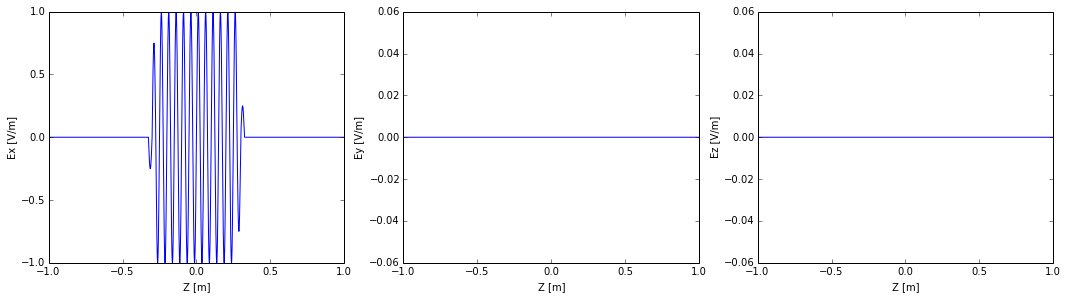

# OSCARS format file
-1               # X Start position
2                # Step size in X
2                # Number of points in X
-1               # Y Start position
2                # Step size in Y
2                # Number of points in Y
-1               # Z Start position
0.00040008       # Step size in Z
5000             # Number of points in Z
0.000000e+00 0.000000e+00 0.000000e+00
0.000000e+00 0.000000e+00 0.000000e+00
0.000000e+00 0.000000e+00 0.000000e+00
0.000000e+00 0.000000e+00 0.000000e+00
0.000000e+00 0.000000e+00 0.000000e+00


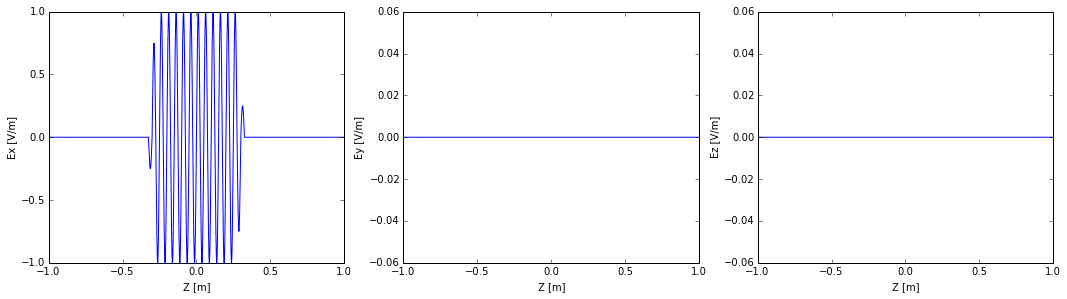

In [14]:
# To illustrate the basic 3D format let's create a data file, then import it.
# It will be plotted before and after the import

# Create an undulator field
osc.clear_efields()
osc.add_efield_undulator(efield=[1, 0, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osc, -1, 1, axis='Z')

# Now write the field to a file
osc.write_efield(ofile='AAElectricFields_OSCARS.dat', oformat='OSCARS', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)

# Print a bit of the file so you can see it
with open("AAElectricFields_OSCARS.dat") as myfile:
    for i in range(15): print next(myfile),
    

# Clear fields and import the field from the file created above
osc.clear_efields()
osc.add_efield_file(ifile='AAElectricFields_OSCARS.dat', iformat='OSCARS')

plot_efield(osc, -1, 1, axis='Z')

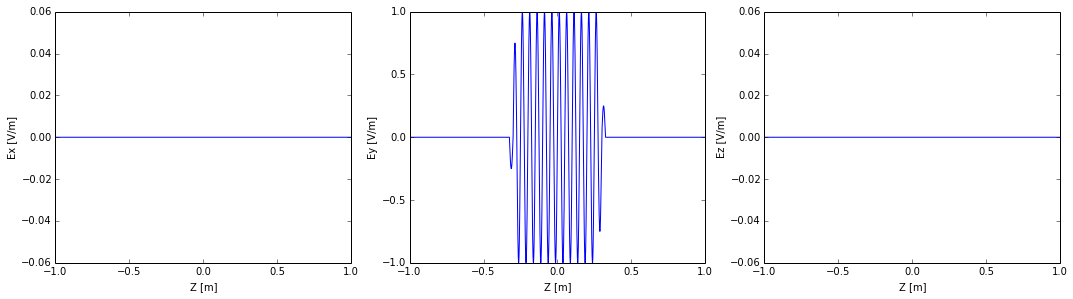

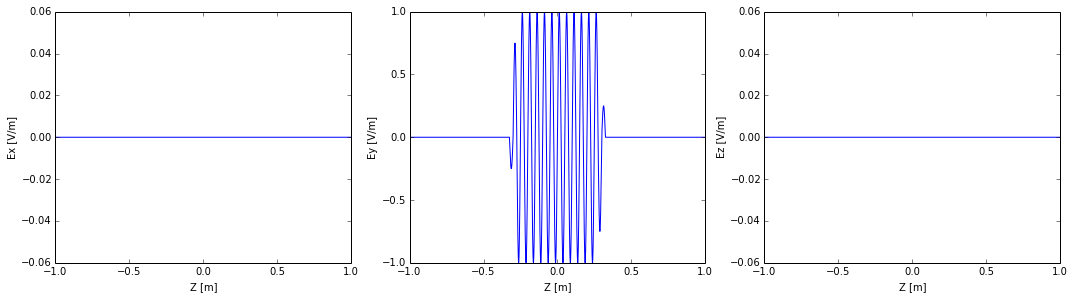

In [15]:
# To illustrate the basic 3D format let's create a data file, then import it.
# It will be plotted before and after the import

# Make an undulator field
osc.clear_efields()
osc.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osc, -1, 1)

# Now write the field to a file
osc.write_efield(ofile='AAElectricFields_SPECTRA.dat', oformat='SPECTRA', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)

# Clear fields and import the field from the file created above
osc.clear_efields()
osc.add_efield_file(ifile='AAElectricFields_SPECTRA.dat', iformat='SPECTRA')

plot_efield(osc, -1, 1)

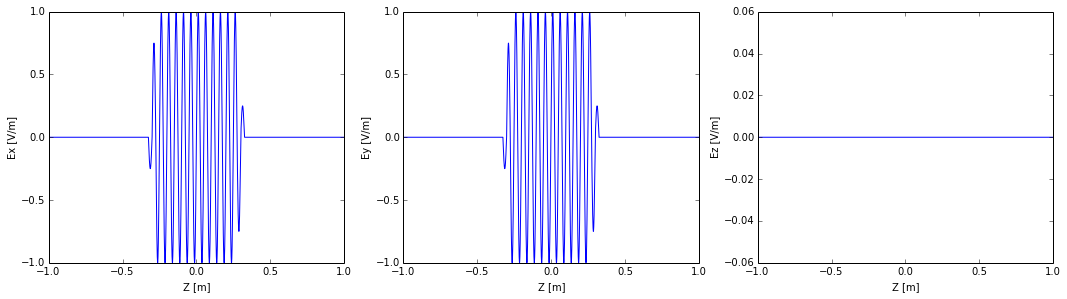

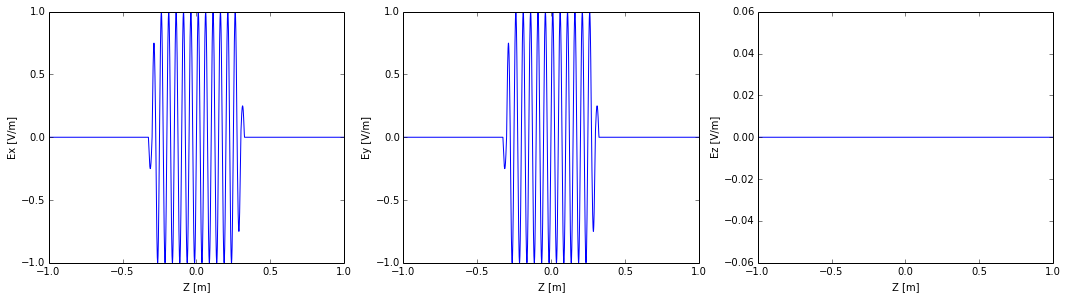

In [16]:
# To illustrate the basic 3D format let's create a data file, then import it.
# It will be plotted before and after the import

# Make an undulator field
osc.clear_efields()
osc.add_efield_undulator(efield=[1, 1, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osc)

# Now write the field to a file
osc.write_efield(ofile='AAElectricFields_SPECTRA.dat', oformat='SRW', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)

# Clear fields and import the field from the file created above
osc.clear_efields()
osc.add_efield_file(ifile='AAElectricFields_SPECTRA.dat', iformat='SRW')

plot_efield(osc)

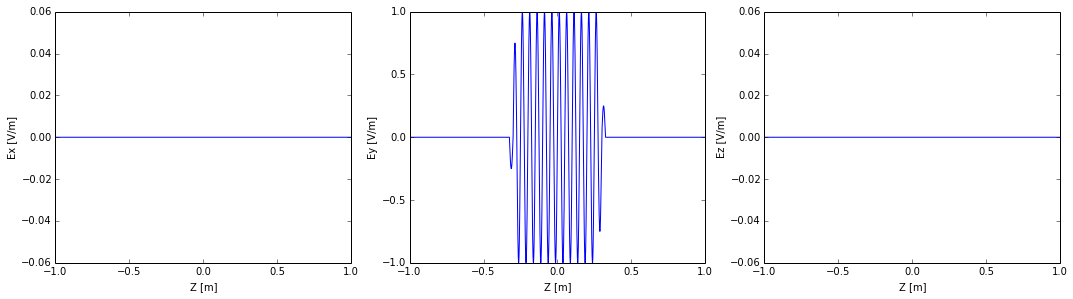

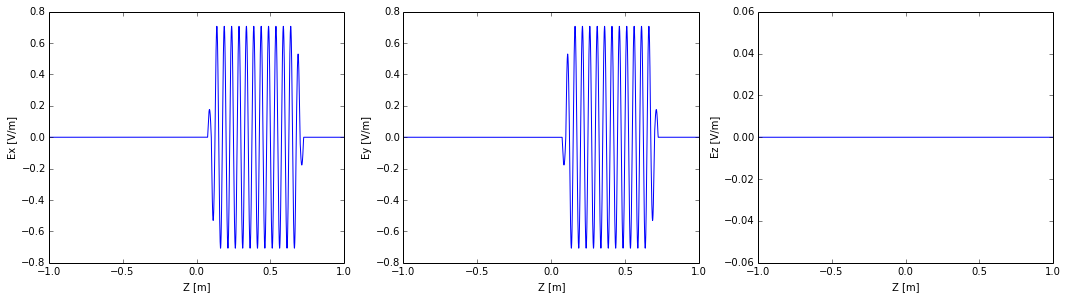

In [17]:
# One can also rotate and translate on importing a field file

# Create an undulator field
osc.clear_efields()
osc.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osc)

# Now write the field to a file
osc.write_efield(ofile='AAElectricFields_OSCARS.dat', oformat='OSCARS', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)

# Clear fields and import the field from the file created above
osc.clear_efields()
osc.add_efield_file(ifile='AAElectricFields_OSCARS.dat', iformat='OSCARS', rotations=[0, 0, osc.pi()/4], translation=[0, 0, 0.4])

plot_efield(osc)

## Python Function for a Field

You can make your own python function and import it as a electric field.  All you need is a function which has 4 arguments: x, y, z, t.  *t* is not used at the moment but will be in future versions so it is required here for compatibility.  The function must return the BField in 3-dimensions as a list [Bx, By, Bz]

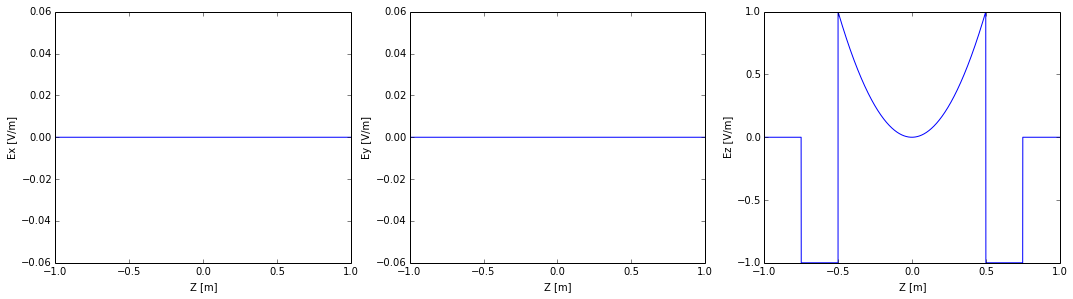

In [18]:
# Define a field function for use with OSCARS
def MyField (x, y, z, t):
    """User defined electric field in python function.  Must return a list: [Bx, By, Bz]"""
    
    if z >= -0.75 and z < -0.50:
        return [0, 0, -1]
    elif z >= -0.50 and z < 0.50:
        return [0, 0, 4*z*z]
    elif z >= 0.50 and z < 0.75:
        return [0, 0, -1]
    return [0, 0, 0]

# Add the field function to oscars and plot it
osc.clear_efields()
osc.add_efield_function(MyField)
plot_efield(osc, -1, 1, axis='Z')

## Combined Fields

Add as many fields as you like to OSCARS

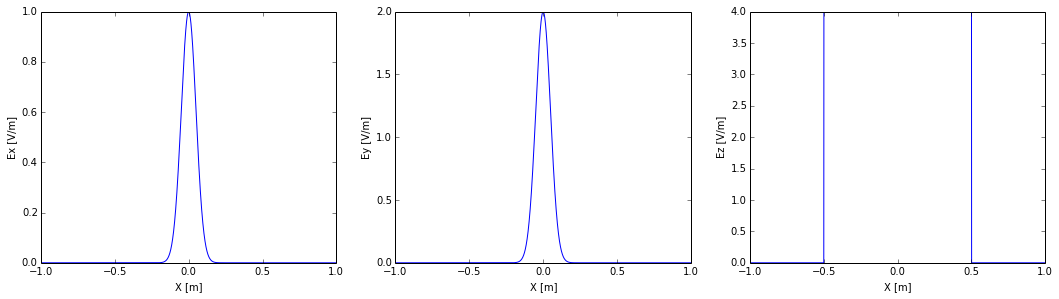

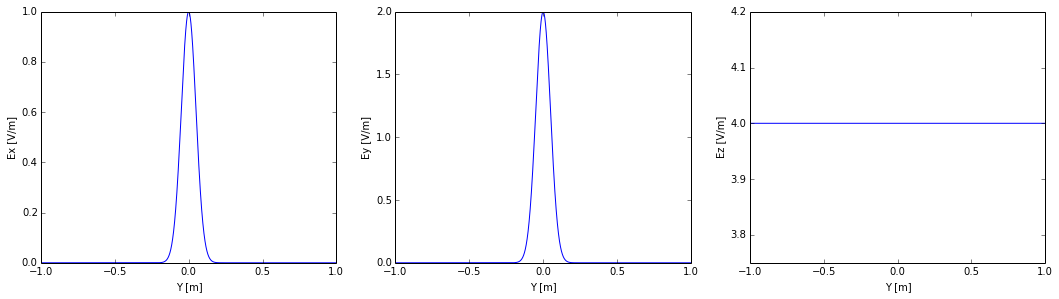

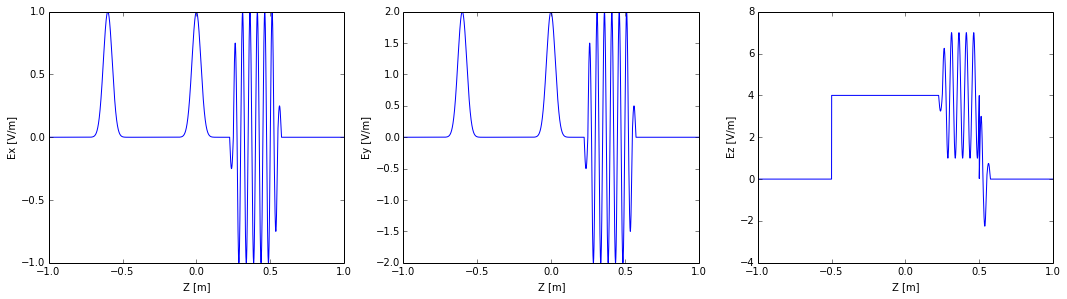

In [19]:
osc.clear_efields()
osc.add_efield_uniform(efield=[0, 0, 4], width=[1, 2, 1])
osc.add_efield_gaussian(efield=[1, 2, 0], sigma=[0.05, 0.05, 0.03])
osc.add_efield_gaussian(efield=[1, 2, 0], sigma=[0.05, 0.05, 0.03], translation=[0, 0, -0.3])
osc.add_efield_undulator(efield=[1, 2, 3], period=[0, 0, 0.050], nperiods=5, translation=[0, 0, 0.4])

# Plot the field if you like
plot_efield(osc, -1, 1, axis='X')
plot_efield(osc, -1, 1, axis='Y')
plot_efield(osc, -1, 1, axis='Z')